In [1]:
#Step 01: Import the required libraries
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Python data visualization library form matplotlib

In [2]:
#Set Pandas Options to show the data
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#Step 02: Load the dataset
data_frame = pd.read_csv('monkeypox_dataset.csv')

#List down the columns
data_frame.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

In [4]:
#Step 03: Retain the required variables
retained_variables = [
    'Test ID','Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count',
       'Age', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'
]

data_frame_with_retained_variables = data_frame[retained_variables]
display(data_frame_with_retained_variables)#Test the code (remove later)

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,NaN,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,37,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,24,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,34,1,0.0,Positive
3,AA0024,NaN,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,40,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,36,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,NaN,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,56,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,50,1,1.0,Positive
24997,AH33694,NaN,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,24,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,56,1,0.0,Negative


## Task 02: Basic Statistical Description

In [5]:
#Step 04: Basic Statistical Description
# description = data_frame_with_retained_variables.describe(include='all')
description = data_frame_with_retained_variables.describe()
display(description)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Health Insurance,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,2.500000e+04,25000.000000,25000.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,5.004591e+06,7749.114440,0.498480,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,5.204760e+05,1885.213591,0.500008,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100135e+06,4500.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555418e+06,6116.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.002304e+06,7747.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.458530e+06,9379.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.899806e+06,11000.000000,1.000000,1.000000


In [6]:
#Step 05: Measurement Scale Type
measurement_scale = data_frame_with_retained_variables.dtypes
display(measurement_scale)

Test ID                            object
Systemic Illness                   object
Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                       object
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Red blood cells count               int64
White blood cells count             int64
Age                                object
Health Insurance                    int64
Sexually Transmitted Infection    float64
MPOX PCR Result                    object
dtype: object

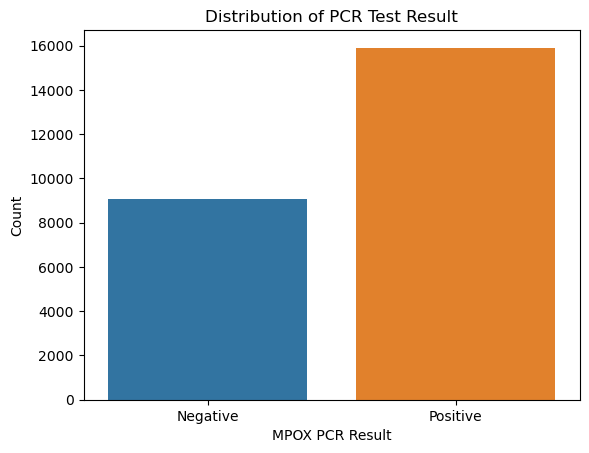

In [7]:
#Step 06: Plot the distribution of class variables
sns.countplot(x = 'MPOX PCR Result', data=data_frame_with_retained_variables)
plt.xlabel('MPOX PCR Result')
plt.ylabel('Count')
plt.title('Distribution of PCR Test Result')
plt.show()

array([[<Axes: title={'center': 'Encoded Systemic Illness'}>,
        <Axes: title={'center': 'Rectal Pain'}>,
        <Axes: title={'center': 'Sore Throat'}>],
       [<Axes: title={'center': 'Penile Oedema'}>,
        <Axes: title={'center': 'Solitary Lesion'}>,
        <Axes: title={'center': 'Swollen Tonsils'}>],
       [<Axes: title={'center': 'HIV Infection'}>,
        <Axes: title={'center': 'Red blood cells count'}>,
        <Axes: title={'center': 'White blood cells count'}>],
       [<Axes: title={'center': 'Health Insurance'}>,
        <Axes: title={'center': 'Sexually Transmitted Infection'}>,
        <Axes: >]], dtype=object)

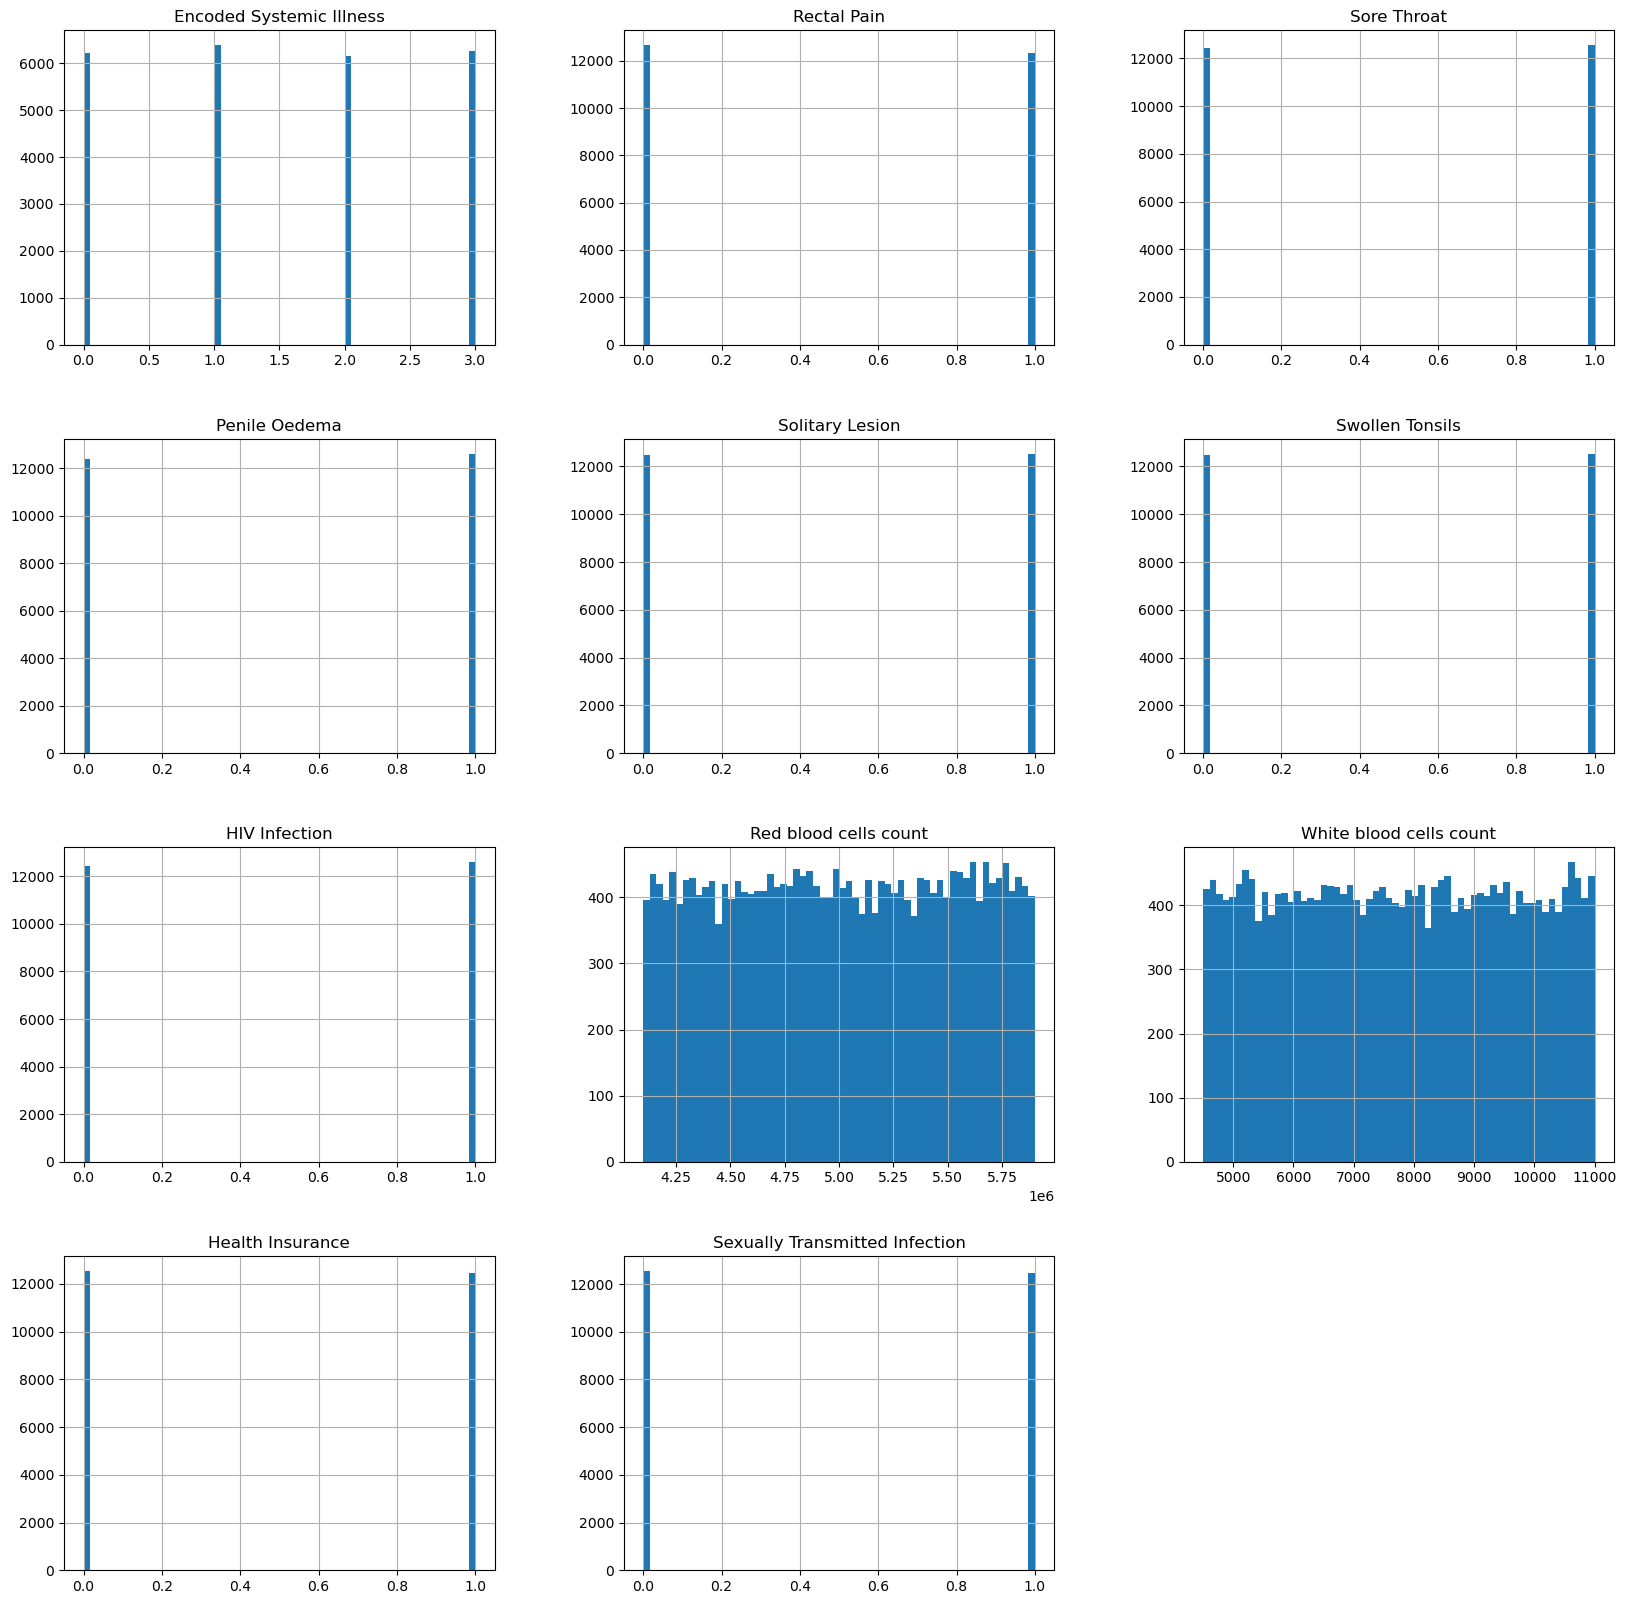

In [8]:
data_frame_with_retained_variables.hist(bins = 60, figsize = (20,20))

# Task 03: Identifying and Fixing the Variable Issues

## Fixing NaN/Errornamouse values in the dataset for each column/variable
1. Check for duplicates
2. Check for NaN values
3. Check for Null values
4. Check for mistakes
5. Check for type issues

In [9]:
data_frame_with_retained_variables.duplicated().sum()

0

In [10]:
data_frame_with_retained_variables.isna().sum()

Test ID                              0
Systemic Illness                  6216
Encoded Systemic Illness             2
Rectal Pain                          3
Sore Throat                          0
Penile Oedema                        6
Oral Lesions                         4
Solitary Lesion                      0
Swollen Tonsils                      7
HIV Infection                        5
Red blood cells count                0
White blood cells count              0
Age                                 36
Health Insurance                     0
Sexually Transmitted Infection       4
MPOX PCR Result                      0
dtype: int64

### Fixing the systemic illness mistakenly entered value

In [11]:
#Systemic Illness | Mistaken value
data_frame_with_retained_variables[data_frame_with_retained_variables['Systemic Illness']=='fever']

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
33,AA0054,fever,1.0,0.0,0,0.0,1,0,0.0,0.0,4829403,9994,36,1,1.0,Negative


In [12]:
#Fixing the Systemic Illness
mask = (data_frame_with_retained_variables['Systemic Illness'] == 'fever') 
data_frame_with_retained_variables.loc[mask, 'Systemic Illness'] = 'Fever'
data_frame_with_retained_variables[data_frame_with_retained_variables['Systemic Illness']=='fever']


,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Dropping the Systemic Illness clean data

In [13]:
#drop the systemic illness 
retained_variables = [
    'Test ID', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count',
       'Age', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'
]

data_frame_with_retained_variables = data_frame[retained_variables]
display(data_frame_with_retained_variables)#Test the code (remove later)

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,37,0,0.0,Negative
1,AA0022,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,24,1,0.0,Positive
2,AA0023,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,34,1,0.0,Positive
3,AA0024,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,40,0,0.0,Positive
4,AA0025,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,36,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,56,0,1.0,Positive
24996,AH33693,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,50,1,1.0,Positive
24997,AH33694,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,24,1,0.0,Positive
24998,AH33695,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,56,1,0.0,Negative


### Fixing the encoded systemic illness NaN value by Using minimum value

In [14]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Encoded Systemic Illness'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
181,AA0202,NaN,1.0,0,0.0,0,0,1.0,0.0,4399681,8767,39,0,1.0,Negative
199,AA0220,NaN,0.0,1,1.0,0,1,0.0,1.0,5003840,10090,33,0,1.0,Negative


In [15]:
mask = (data_frame_with_retained_variables['Encoded Systemic Illness'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Encoded Systemic Illness'] = 1.0
data_frame_with_retained_variables[data_frame_with_retained_variables['Encoded Systemic Illness'].isna().values]


,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Fixing the rectal pain NaN value by Using Median

In [16]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Rectal Pain'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
153,AA0174,3.0,NaN,0,0.0,0,0,0.0,1.0,4699066,10064,60,0,1.0,Positive
154,AA0175,1.0,NaN,0,0.0,1,0,0.0,0.0,5448272,8571,29,1,1.0,Negative
155,AA0176,3.0,NaN,1,1.0,1,1,0.0,1.0,5743667,9732,30,1,1.0,Positive


In [17]:
rectal_pain_median = data_frame_with_retained_variables['Rectal Pain'].median()
mask = (data_frame_with_retained_variables['Rectal Pain'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Rectal Pain'] = rectal_pain_median
data_frame_with_retained_variables[data_frame_with_retained_variables['Rectal Pain'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Fixing the Penile Oedema NaN value by Using median

In [18]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Penile Oedema'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
27,AA0048,0.0,0.0,1,NaN,0,1,1.0,1.0,4575169,7879,61,0,1.0,Positive
28,AA0049,0.0,0.0,0,NaN,1,1,0.0,1.0,4366768,7425,61,0,0.0,Negative
52,AA0073,3.0,0.0,1,NaN,0,1,0.0,0.0,5826085,5221,61,1,1.0,Positive
53,AA0074,3.0,1.0,0,NaN,0,0,0.0,0.0,4234481,10727,27,1,0.0,Positive
54,AA0075,2.0,1.0,1,NaN,0,1,1.0,1.0,5559877,5293,59,0,1.0,Negative
55,AA0076,2.0,0.0,1,NaN,1,1,0.0,1.0,5826788,8742,36,0,0.0,Positive


In [19]:
penile_median = data_frame_with_retained_variables['Penile Oedema'].median()
mask = (data_frame_with_retained_variables['Penile Oedema'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Penile Oedema'] = penile_median
data_frame_with_retained_variables[data_frame_with_retained_variables['Penile Oedema'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Fixing the Oral Lesions Yes/No Values by replacing with 1/0

In [20]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions'] == 'YES']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
332,AA0353,0.0,1.0,0,1.0,YES,1,0.0,0.0,5226910,7543,31,0,0.0,Positive
412,AA0433,2.0,1.0,0,0.0,YES,0,1.0,1.0,5747619,6609,57,0,1.0,Negative
489,AB0163,0.0,1.0,1,1.0,YES,0,0.0,0.0,4462679,9392,31,0,1.0,Positive
532,AB0206,1.0,0.0,0,1.0,YES,0,1.0,1.0,5695257,9155,54,1,1.0,Negative


In [21]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions'] == 'No']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
591,AB0265,1.0,0.0,1,1.0,No,0,0.0,0.0,4998519,7741,34,0,1.0,Positive
597,AB0271,2.0,1.0,1,1.0,No,0,0.0,0.0,5650584,4558,61,1,1.0,Positive
630,AB0304,0.0,0.0,1,0.0,No,1,0.0,0.0,4292289,10801,41,0,1.0,Negative
655,AB0329,1.0,1.0,1,1.0,No,1,1.0,1.0,4451844,10370,58,1,0.0,Positive
707,AB0381,2.0,1.0,0,0.0,No,0,1.0,0.0,4782719,10174,41,0,1.0,Negative
732,AB0406,3.0,1.0,1,1.0,No,0,0.0,1.0,4555153,6249,35,0,0.0,Negative
760,AB0434,3.0,0.0,1,0.0,No,1,1.0,1.0,4798148,4579,43,0,0.0,Negative


In [22]:
mask = (data_frame_with_retained_variables['Oral Lesions'] == 'YES')
data_frame_with_retained_variables.loc[mask, 'Oral Lesions'] = 1
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions']=='YES']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


In [23]:
mask = (data_frame_with_retained_variables['Oral Lesions'] == 'No')
data_frame_with_retained_variables.loc[mask, 'Oral Lesions'] = 0
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions']=='No']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Fixing the Oral Lesions NaN value by using median

In [24]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
125,AA0146,1.0,0.0,1,0.0,NaN,0,1.0,1.0,4913093,9593,29,1,1.0,Positive
126,AA0147,1.0,0.0,1,1.0,NaN,1,0.0,0.0,4941005,9111,NaN,0,0.0,Positive
127,AA0148,1.0,1.0,0,0.0,NaN,0,0.0,0.0,5054390,6137,57,1,0.0,Positive
128,AA0149,3.0,1.0,0,0.0,NaN,0,1.0,1.0,5610746,8803,54,0,1.0,Negative


In [25]:
oral_median = data_frame_with_retained_variables['Oral Lesions'].median()
mask = (data_frame_with_retained_variables['Oral Lesions'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Oral Lesions'] = oral_median
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Remove the missing Age records 

In [26]:
data_frame_with_retained_variables = data_frame_with_retained_variables.dropna(subset=['Age'])


### Cleaning the Sexually Transmissted records with median value

In [27]:
data_frame_with_retained_variables[data_frame_with_retained_variables['HIV Infection'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
292,AA0313,1.0,0.0,1,1.0,0,1,1.0,NaN,4553304,9935,30,0,0.0,Positive
293,AA0314,3.0,0.0,1,1.0,1,0,0.0,NaN,4669074,5767,59,1,0.0,Positive
296,AA0317,1.0,1.0,0,0.0,1,0,0.0,NaN,4345020,5567,53,0,1.0,Positive
297,AA0318,2.0,0.0,1,1.0,1,1,1.0,NaN,5204032,5177,36,0,0.0,Positive
300,AA0321,1.0,0.0,1,0.0,1,0,0.0,NaN,5470467,9870,46,1,1.0,Positive


In [28]:
hiv_median = data_frame_with_retained_variables['HIV Infection'].median()
mask = (data_frame_with_retained_variables['HIV Infection'].isna()) 
data_frame_with_retained_variables.loc[mask, 'HIV Infection'] = hiv_median
data_frame_with_retained_variables[data_frame_with_retained_variables['HIV Infection'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


In [29]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# cleaned_data['HIV Infection'] = imputer.fit_transform(cleaned_data[['HIV Infection']])

### Fixing Swollen Tonsils

In [30]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Swollen Tonsils'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
38,AA0059,1.0,1.0,1,1.0,0,0,NaN,0.0,4885900,8214,47,0,1.0,Negative
39,AA0060,2.0,1.0,0,1.0,0,0,NaN,0.0,5118075,9008,25,0,0.0,Positive
40,AA0061,2.0,0.0,1,1.0,1,1,NaN,0.0,4190283,5577,58,0,0.0,Positive
41,AA0062,0.0,0.0,1,0.0,1,1,NaN,0.0,4299921,7494,37,0,1.0,Negative
42,AA0063,3.0,1.0,0,1.0,0,1,NaN,0.0,5353330,4763,35,1,1.0,Positive
99,AA0120,2.0,1.0,1,1.0,1,1,NaN,1.0,5382379,9953,24,1,1.0,Positive
100,AA0121,3.0,1.0,1,0.0,1,0,NaN,1.0,4798975,5890,38,0,1.0,Positive


In [31]:
tonsils_median = data_frame_with_retained_variables['Swollen Tonsils'].median()
mask = (data_frame_with_retained_variables['Swollen Tonsils'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Swollen Tonsils'] = tonsils_median
data_frame_with_retained_variables[data_frame_with_retained_variables['Swollen Tonsils'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Fixing Sexually Transmitted Infection

In [32]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Sexually Transmitted Infection'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
62,AA0083,3.0,1.0,0,0.0,1,0,0.0,0.0,4966828,10181,57,1,NaN,Positive
63,AA0084,2.0,0.0,0,1.0,1,1,1.0,0.0,4421712,7142,53,1,NaN,Negative
64,AA0085,2.0,0.0,0,1.0,1,1,1.0,0.0,4820505,6767,54,0,NaN,Positive
65,AA0086,3.0,0.0,1,0.0,1,1,1.0,0.0,5302421,9698,41,0,NaN,Positive


In [33]:
sexually_transmitted_median = data_frame_with_retained_variables['Sexually Transmitted Infection'].median()
mask = (data_frame_with_retained_variables['Sexually Transmitted Infection'].isna()) 
data_frame_with_retained_variables.loc[mask, 'Sexually Transmitted Infection'] = sexually_transmitted_median
data_frame_with_retained_variables[data_frame_with_retained_variables['Sexually Transmitted Infection'].isna().values]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


### Converting Oral Lesions column to int (Str to int)

In [34]:
data_frame_with_retained_variables['Oral Lesions'].value_counts()

Oral Lesions
0      12485
1      12465
0.0       10
1          4
Name: count, dtype: int64

In [35]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Oral Lesions']== 0.0]

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
125,AA0146,1.0,0.0,1,0.0,0.0,0,1.0,1.0,4913093,9593,29,1,1.0,Positive
127,AA0148,1.0,1.0,0,0.0,0.0,0,0.0,0.0,5054390,6137,57,1,0.0,Positive
128,AA0149,3.0,1.0,0,0.0,0.0,0,1.0,1.0,5610746,8803,54,0,1.0,Negative
591,AB0265,1.0,0.0,1,1.0,0,0,0.0,0.0,4998519,7741,34,0,1.0,Positive
597,AB0271,2.0,1.0,1,1.0,0,0,0.0,0.0,5650584,4558,61,1,1.0,Positive
630,AB0304,0.0,0.0,1,0.0,0,1,0.0,0.0,4292289,10801,41,0,1.0,Negative
655,AB0329,1.0,1.0,1,1.0,0,1,1.0,1.0,4451844,10370,58,1,0.0,Positive
707,AB0381,2.0,1.0,0,0.0,0,0,1.0,0.0,4782719,10174,41,0,1.0,Negative
732,AB0406,3.0,1.0,1,1.0,0,0,0.0,1.0,4555153,6249,35,0,0.0,Negative
760,AB0434,3.0,0.0,1,0.0,0,1,1.0,1.0,4798148,4579,43,0,0.0,Negative


In [36]:
data_frame_with_retained_variables['Oral Lesions'] = data_frame_with_retained_variables['Oral Lesions'].astype(int)

In [43]:
data_frame_with_retained_variables['Age'].value_counts()

Age
47        698
33        684
50        683
58        676
43        675
48        673
41        672
46        669
53        669
37        668
60        665
29        656
26        654
49        651
34        650
39        650
35        647
59        643
25        641
36        641
55        635
45        634
32        632
61        631
52        628
23        624
28        624
40        623
31        622
51        621
38        621
44        617
42        614
30        611
24        604
57        597
54        591
27        583
56        582
150         1
0           1
Twenty      1
181         1
-23         1
Name: count, dtype: int64

In [50]:
data_frame_with_retained_variables.loc[((data_frame_with_retained_variables['Age'] > 100) | (data_frame_with_retained_variables['Age'] < 15)), 'Age'] = pd.NA
data_frame_with_retained_variables.dropna(subset=['Age'], inplace=True)

<Axes: xlabel='Test ID', ylabel='Age'>

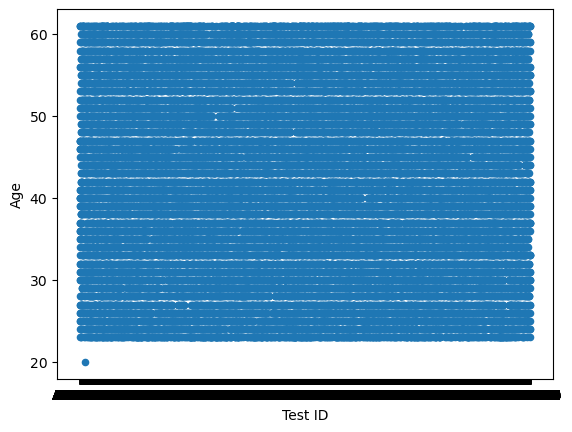

In [51]:
data_frame_with_retained_variables[['Test ID', 'Age']].plot(kind='scatter', x="Test ID", y='Age')

In [44]:
data_frame_with_retained_variables[data_frame_with_retained_variables['Age'] == 'Twenty']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
323,AA0344,3.0,1.0,0,0.0,0,1,1.0,0.0,4525687,9840,Twenty,0,1.0,0


In [45]:
mask = (data_frame_with_retained_variables['Age'] == 'Twenty')
data_frame_with_retained_variables.loc[mask, 'Age'] = 20
data_frame_with_retained_variables[data_frame_with_retained_variables['Age']=='Twenty']

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result


In [47]:
data_frame_with_retained_variables['Age'] = data_frame_with_retained_variables['Age'].astype(int)

In [48]:
data_frame_with_retained_variables['Age'] = data_frame_with_retained_variables['Age'].abs()

In [52]:
data_frame_with_retained_variables['Age'].value_counts()

Age
47.0    698
33.0    684
50.0    683
58.0    676
43.0    675
48.0    673
41.0    672
46.0    669
53.0    669
37.0    668
60.0    665
29.0    656
26.0    654
49.0    651
39.0    650
34.0    650
35.0    647
59.0    643
36.0    641
25.0    641
55.0    635
45.0    634
32.0    632
61.0    631
52.0    628
23.0    625
28.0    624
40.0    623
31.0    622
51.0    621
38.0    621
44.0    617
42.0    614
30.0    611
24.0    604
57.0    597
54.0    591
27.0    583
56.0    582
20.0      1
Name: count, dtype: int64

### Converting the MPOX target variable to numeric

In [37]:
mapping = {'Positive': 1, 'Negative': 0}
data_frame_with_retained_variables['MPOX PCR Result'] = data_frame_with_retained_variables['MPOX PCR Result'].map(mapping)

## Final Output after cleaning

In [38]:
#Last check to verify if all the data issues has fixed 
data_frame_with_retained_variables.isna().sum()

Test ID                           0
Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Red blood cells count             0
White blood cells count           0
Age                               0
Health Insurance                  0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [39]:
#Look for Null Values 
#data_frame_with_retained_variables.isnull().sum()
data_frame_with_retained_variables.isna().sum()

Test ID                           0
Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Red blood cells count             0
White blood cells count           0
Age                               0
Health Insurance                  0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [56]:
binary_data_frame = data_frame_with_retained_variables[[
       'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat','Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'
]]
binary_data_frame
binary_data_frame.apply(pd.Series.value_counts)


,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0.0,6200,12632.0,12429.0,12372.0,12492.0,12457.0,12448.0,12395.0,12534.0
1.0,6377,12329.0,12532.0,12589.0,12469.0,12504.0,12513.0,12566.0,12427.0
2.0,6140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,6244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
measurement_scale = data_frame_with_retained_variables.dtypes
display(measurement_scale)

Test ID                            object
Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                        int64
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Red blood cells count               int64
White blood cells count             int64
Age                                object
Health Insurance                    int64
Sexually Transmitted Infection    float64
MPOX PCR Result                     int64
dtype: object

## Output of Dataset from the Data Cleaning

In [57]:
data_frame_with_retained_variables

,Test ID,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Age,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,37.0,0,0.0,0
1,AA0022,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,24.0,1,0.0,1
2,AA0023,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,34.0,1,0.0,1
3,AA0024,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,40.0,0,0.0,1
4,AA0025,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,36.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,56.0,0,1.0,1
24996,AH33693,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,50.0,1,1.0,1
24997,AH33694,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,24.0,1,0.0,1
24998,AH33695,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,56.0,1,0.0,0


# Task 04: Predictive Classification Model

# Task 05: Evaluating the Model